In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def flop_fft(n):
    return 5 * n * np.log2(n)

def flop_mult():
    return 1

def flop_add():
    return 1

def flop_fnft(n):
    sum = 0
    for k in range(int(np.log2(n)) + 1):
        sum += np.power(2, np.log2(n) - k) * (12 * flop_fft(np.power(2, k + 1) + 1) +
                                              (np.power(2, k + 1) + 1) * (8 * flop_mult() + 4 * flop_add()))
    return sum

def flop_fnft_per_bit(n, n_over, n_mod):
    return flop_fnft(n) / (n / n_over * n_mod)

def flop_dbp(n, n_span, n_step, n_over, n_d, n_mod):
    return 4 * n_span * n_step * ((n_over * n * (np.log2(n) + 1)) / ((n - n_d + 1) * n_mod) + n_over)
    # return 4 * n_span * n_step * ((n_over * n * (np.log2(n) + 1)) / (n_mod) + n_over)


In [3]:
n_span = 12 # 960 km, 80 km per span, 12 spans
n_step = 2
n_d = 400
n_mod = 4 # 2**4 - 16QAM
n_over = 2

n_points = np.array([2 ** i for i in range(12, 25)])
flop = []
flopdbp_12 = []
flopdbp_24 = []
for n in n_points:
    flop.append(flop_fnft_per_bit(n, n_over, n_mod))
    flopdbp_12.append(flop_dbp(n, n_span, n_step, n_over, n_d, n_mod))
    flopdbp_24.append(flop_dbp(n, n_span * 2, n_step, n_over, n_d, n_mod))

In [4]:
flop_ps = []

n_points_per_symbol = np.array([2, 4, 8, 16, 32])
n_symbols = np.array([2 ** i for i in range(5, 25)])
# print(n_points_per_symbol, n_symbols)

for nump in n_points_per_symbol:
    flop_temp = []
    for nums in n_symbols:
        flop_temp.append(flop_fnft(nump * nums) / nums)

    flop_ps.append(flop_temp)

In [5]:
print(n_points)
print(flop)
print(flop_ps)

[    4096     8192    16384    32768    65536   131072   262144   524288
  1048576  2097152  4194304  8388608 16777216]
[5847.180996668198, 6699.238282089587, 7611.268755814663, 8583.284908194468, 9615.293442145523, 10707.297938002257, 11859.300300371384, 13071.301538776366, 14343.302186589077, 15675.302524800545, 17067.302701058838, 18519.30279276426, 20031.302840405115]
[[7961.252995006488, 9938.295659827889, 12151.285083112147, 14602.014004811983, 17291.495611906208, 20220.29499888688, 23388.72398667279, 26796.95312835835, 30445.07502325865, 34333.13963277787, 38461.17376858209, 42829.19175200903, 47437.201201485535, 52285.206155105465, 57373.20874635631, 62701.21009920218, 68269.21080423535, 74077.21117105705, 80125.21136162046, 86413.21146047844], [19876.591319655778, 24302.570166224294, 29204.028009623966, 34582.991223812416, 40440.58999777376, 46777.44797334558, 53593.9062567167, 60890.1500465173, 68666.27926555574, 76922.34753716418, 85658.38350401806, 94874.40240297107, 104570

In [7]:
import matplotlib.pyplot as plt
import matplotlib
# plt.rcParams.update({'font.size': 42})
plt.rcParams.update({'font.size': 40})


# tex style to regular
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

# regular to tex style
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

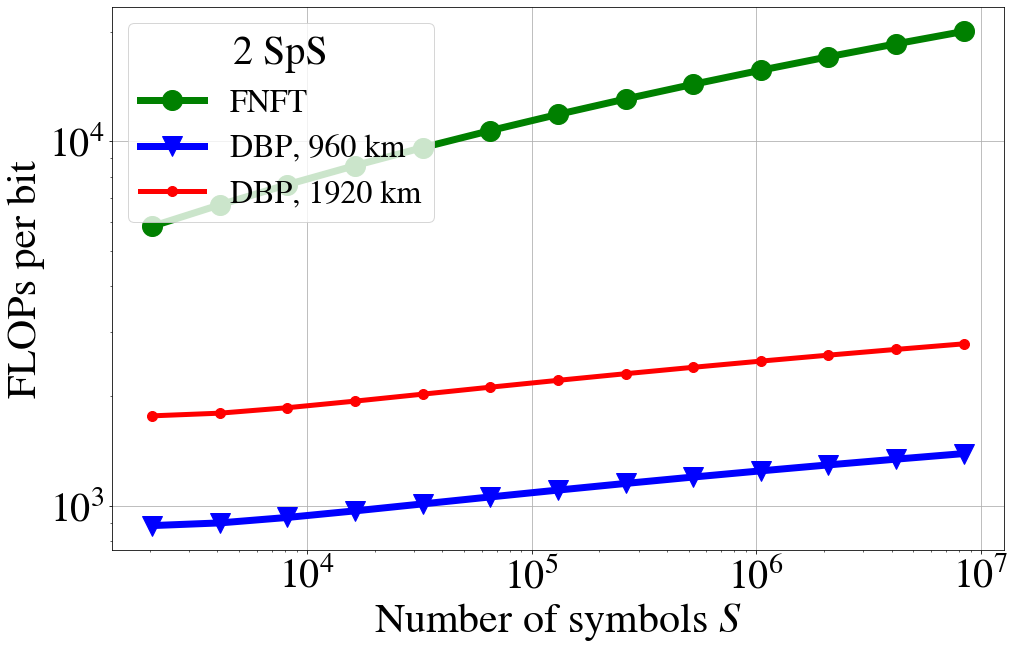

In [101]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(n_points / n_over, np.array(flop), color='green',
        label="FNFT",
        marker='o',
        markersize=20.0,
        linewidth=7.0)
ax.plot(n_points / n_over, np.array(flopdbp_12), color='blue',
        label="DBP, 960 km",
        marker='v',
        markersize=20.0,
        linewidth=7.0)
ax.plot(n_points / n_over, np.array(flopdbp_24), color='red',
        label="DBP, 1920 km",
        marker='.',
        markersize=20.0,
        linewidth=5.0)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_title('')
# ax.set_xlim(-0.5, 0.5)
# ax.set_ylim(-0.2, 17)
ax.set_ylabel(r'FLOPs per bit', fontsize=42)
ax.set_xlabel(r'Number of symbols $S$', fontsize=42)
ax.grid()

plt.legend(title="2 SpS", loc='upper left', fontsize=32)
# plt.tight_layout()
plt.show()
fig.savefig('images_nft_examples/complexity.pdf', format='pdf', bbox_inches='tight')

In [88]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(n_symbols, np.array(flop_ps[0]), color='xkcd:light blue',
        label="2 SpS",
        marker='o',
        markersize=20.0,
        linewidth=7.0)
ax.plot(n_symbols, np.array(flop_ps[1]), color='xkcd:violet',
        label="4 SpS",
        marker='v',
        markersize=20.0,
        linewidth=7.0)
ax.plot(n_symbols, np.array(flop_ps[2]), color='xkcd:lime',
        label="8 SpS",
        marker='^',
        markersize=20.0,
        linewidth=5.0)
ax.plot(n_symbols, np.array(flop_ps[3]), color='xkcd:light red',
        label="16 SpS",
        marker='s',
        markersize=20.0,
        linewidth=5.0)
ax.plot(n_symbols, np.array(flop_ps[4]), color='xkcd:purplish blue',
        label="32 SpS",
        marker='d',
        markersize=20.0,
        linewidth=5.0)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_title('')
# ax.set_xlim(-0.5, 0.5)
# ax.set_ylim(-0.2, 17)
ax.set_ylabel(r'FLOPs per symbol', fontsize=42)
ax.set_xlabel(r'Number of symbols $S$', fontsize=42)
ax.grid()

plt.legend(loc='upper left', fontsize=32)
# plt.tight_layout()
plt.show()
fig.savefig('images_nft_examples/complexity_per_symbol.pdf', format='pdf', bbox_inches='tight')
